# ❓ <font color='green'> <u> PROBLEM STATEMENT (Decision_Tree_Fraud_Check) </u>

## 🔵 Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### ➡ Data Description:
+ #### Undergrad : person is under graduated or not
+ #### Marital.Status : marital status of a person
+ #### Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
+ #### Work Experience : Work experience of an individual person
+ #### Urban : Whether that person belongs to urban area or not

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> Decision Tree</u></font> is a <u> hierarchical model</u> that uses a tree-like structure to display decisions and their possible consequences. It is a type of <u>supervised machine learning</u> that can be used for <u>classification and regression</u> problems. A decision tree can help an individual or organization <u>compare possible actions</u> based on their costs, probabilities and benefits. It can also be used to <u>categorize or make predictions</u> based on how a previous set of questions were answered.
    
* ### Some popular types of decision tree algorithms:
    + ##### C5.0 ( For Classification - uses Entropy Criteria)
    + ##### CART (For Classification - uses Gini Impurity and For Regression Trees- uses RSS)
    + ##### Chi-Square
    + ##### Reduction in Variance

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets_Assignments/main/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [2]:
df.rename(columns = {'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income',
                     'City.Population':'City_Population', 'Work.Experience':'Work_Experience'},
          inplace=True)
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


* ##### <font color ='green'> <u>Creating Target Column:</u>

Tax_Status = Those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [3]:
df['Tax_Status'] = "Good"
df.loc[df['Taxable_Income'] <= 30000,'Tax_Status'] = 'Risky'
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Tax_Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [4]:
df.shape

(600, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Tax_Status       600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [6]:
df.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.isna().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
Tax_Status         0
dtype: int64

In [8]:
df.duplicated().sum()

0

> * #### There are 600 records and 6 Variables.
> * #### All variables are in proper data type.
> * #### "Tax_Status" is target column.
> * #### No null value observed.
> * #### There is no duplicated record.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

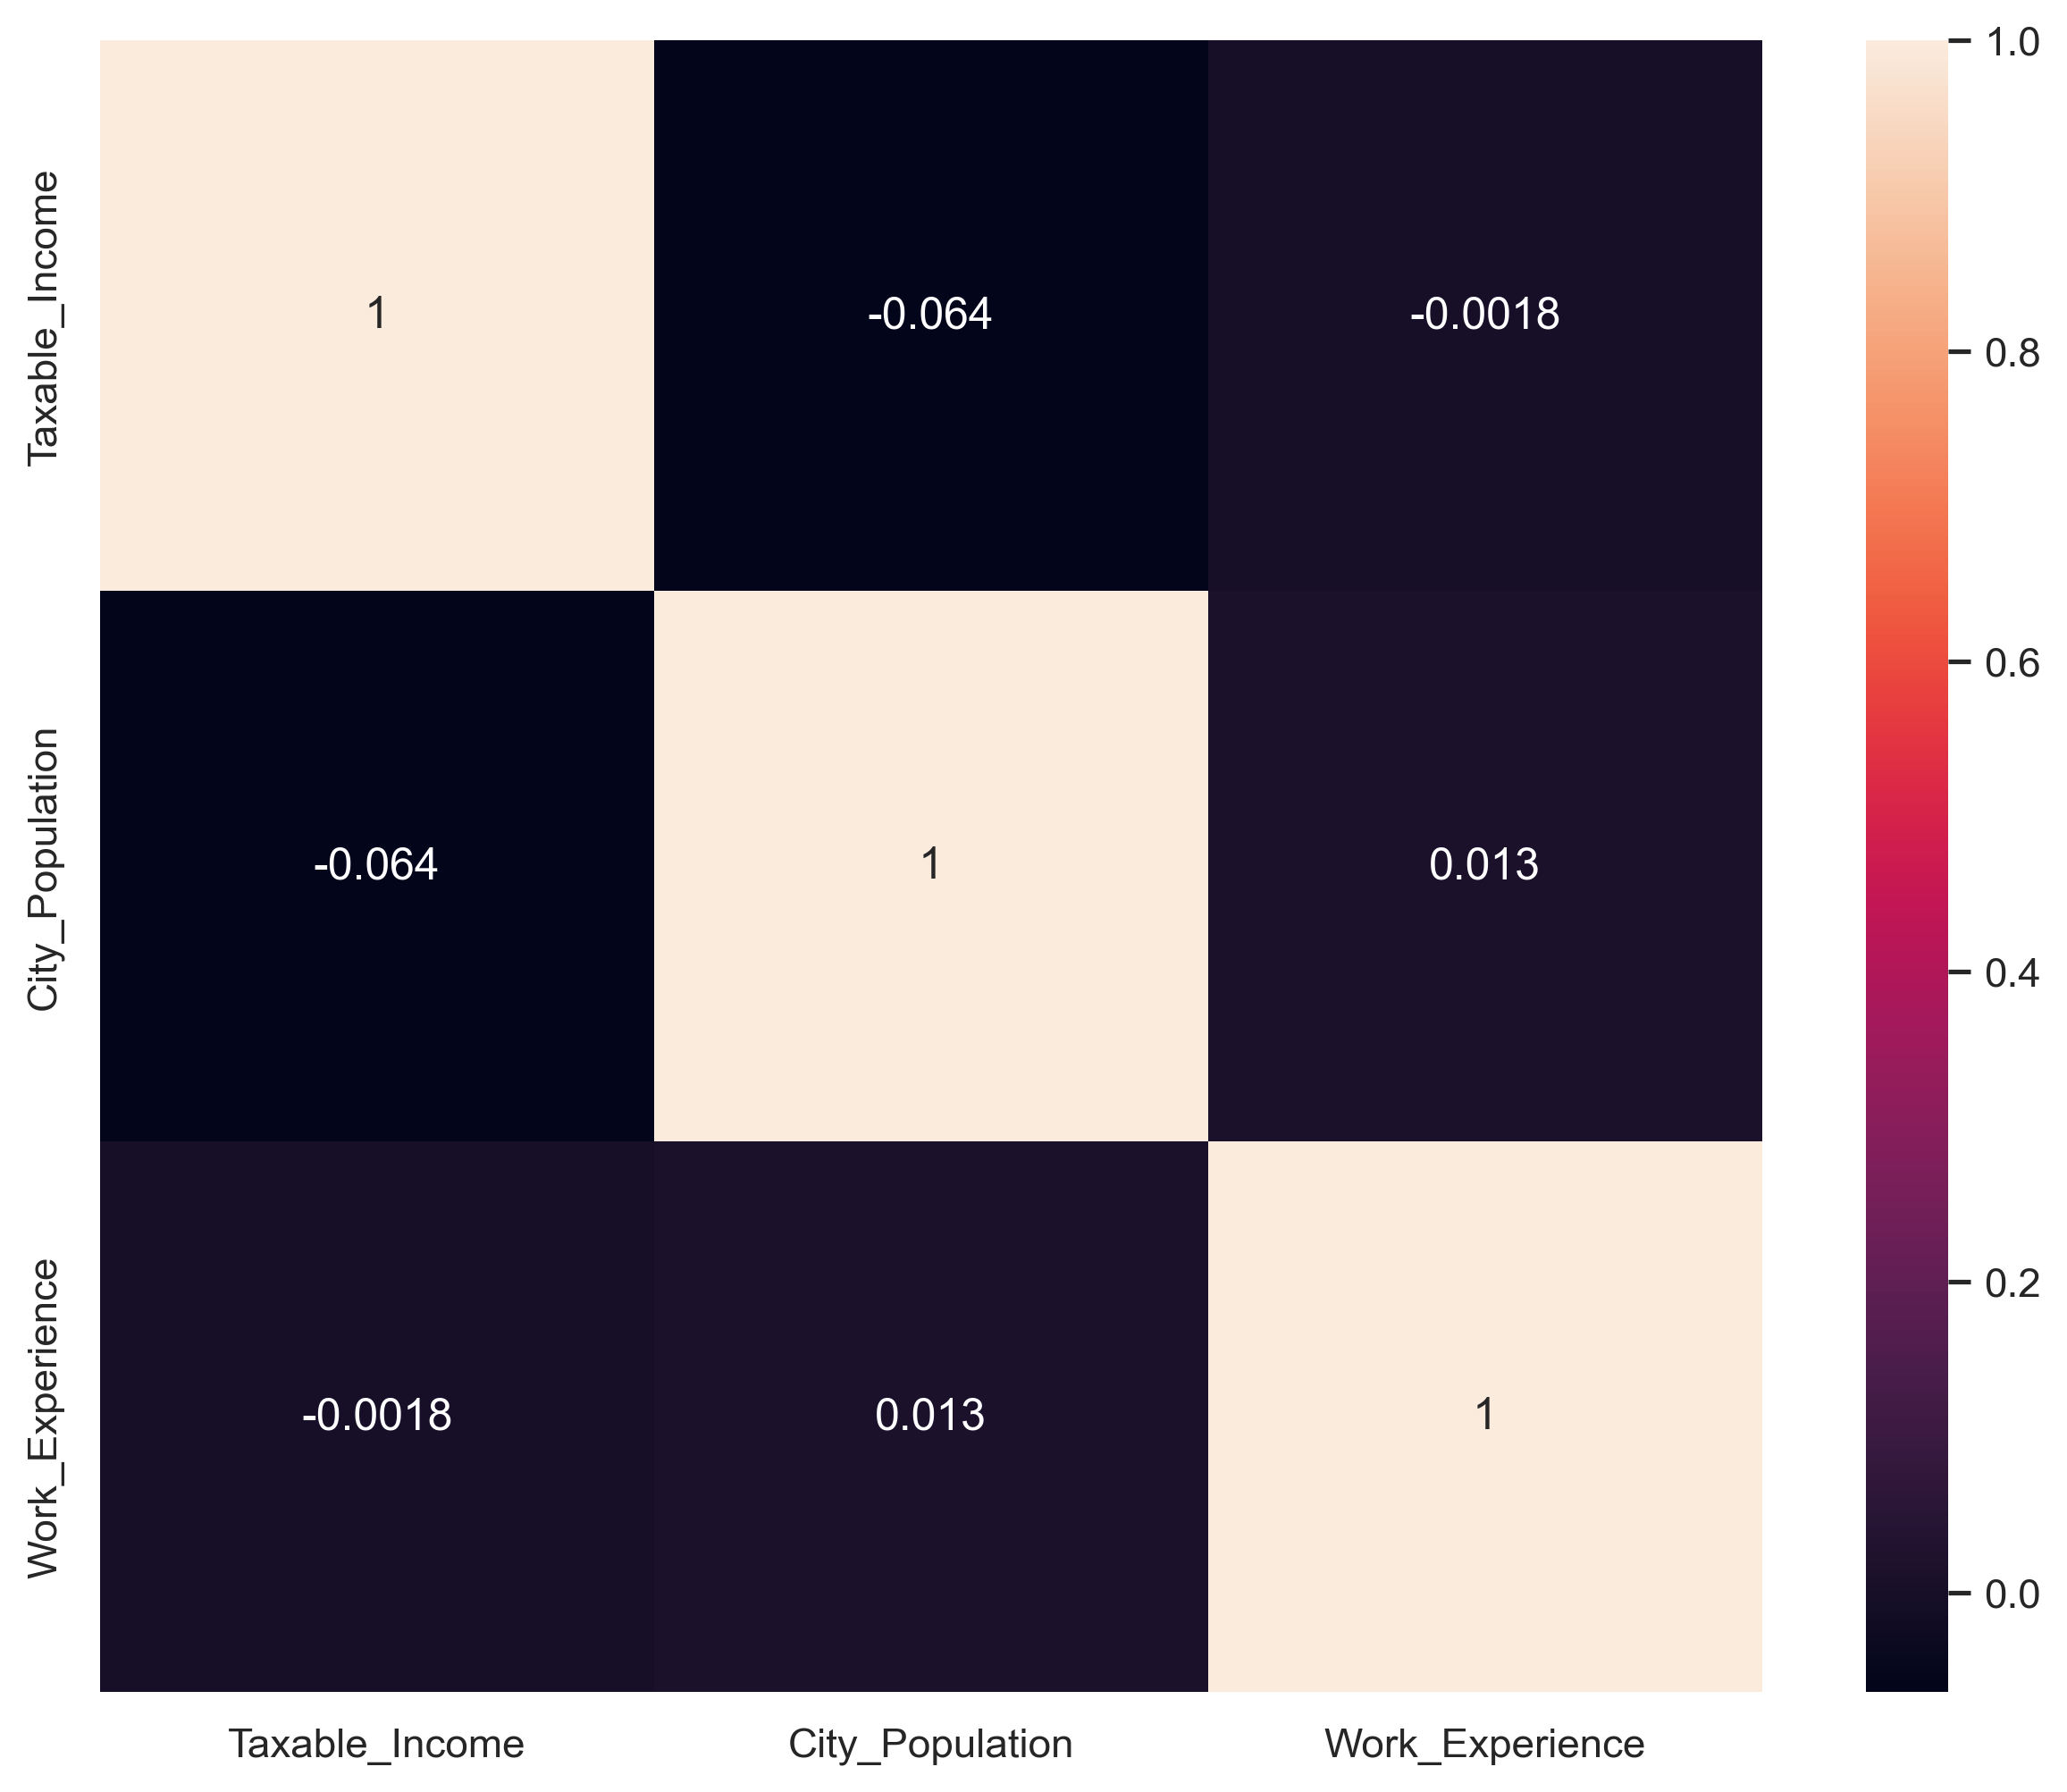

In [9]:
# Correation between Numerical variables:
sns.heatmap(df.corr(), annot = True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

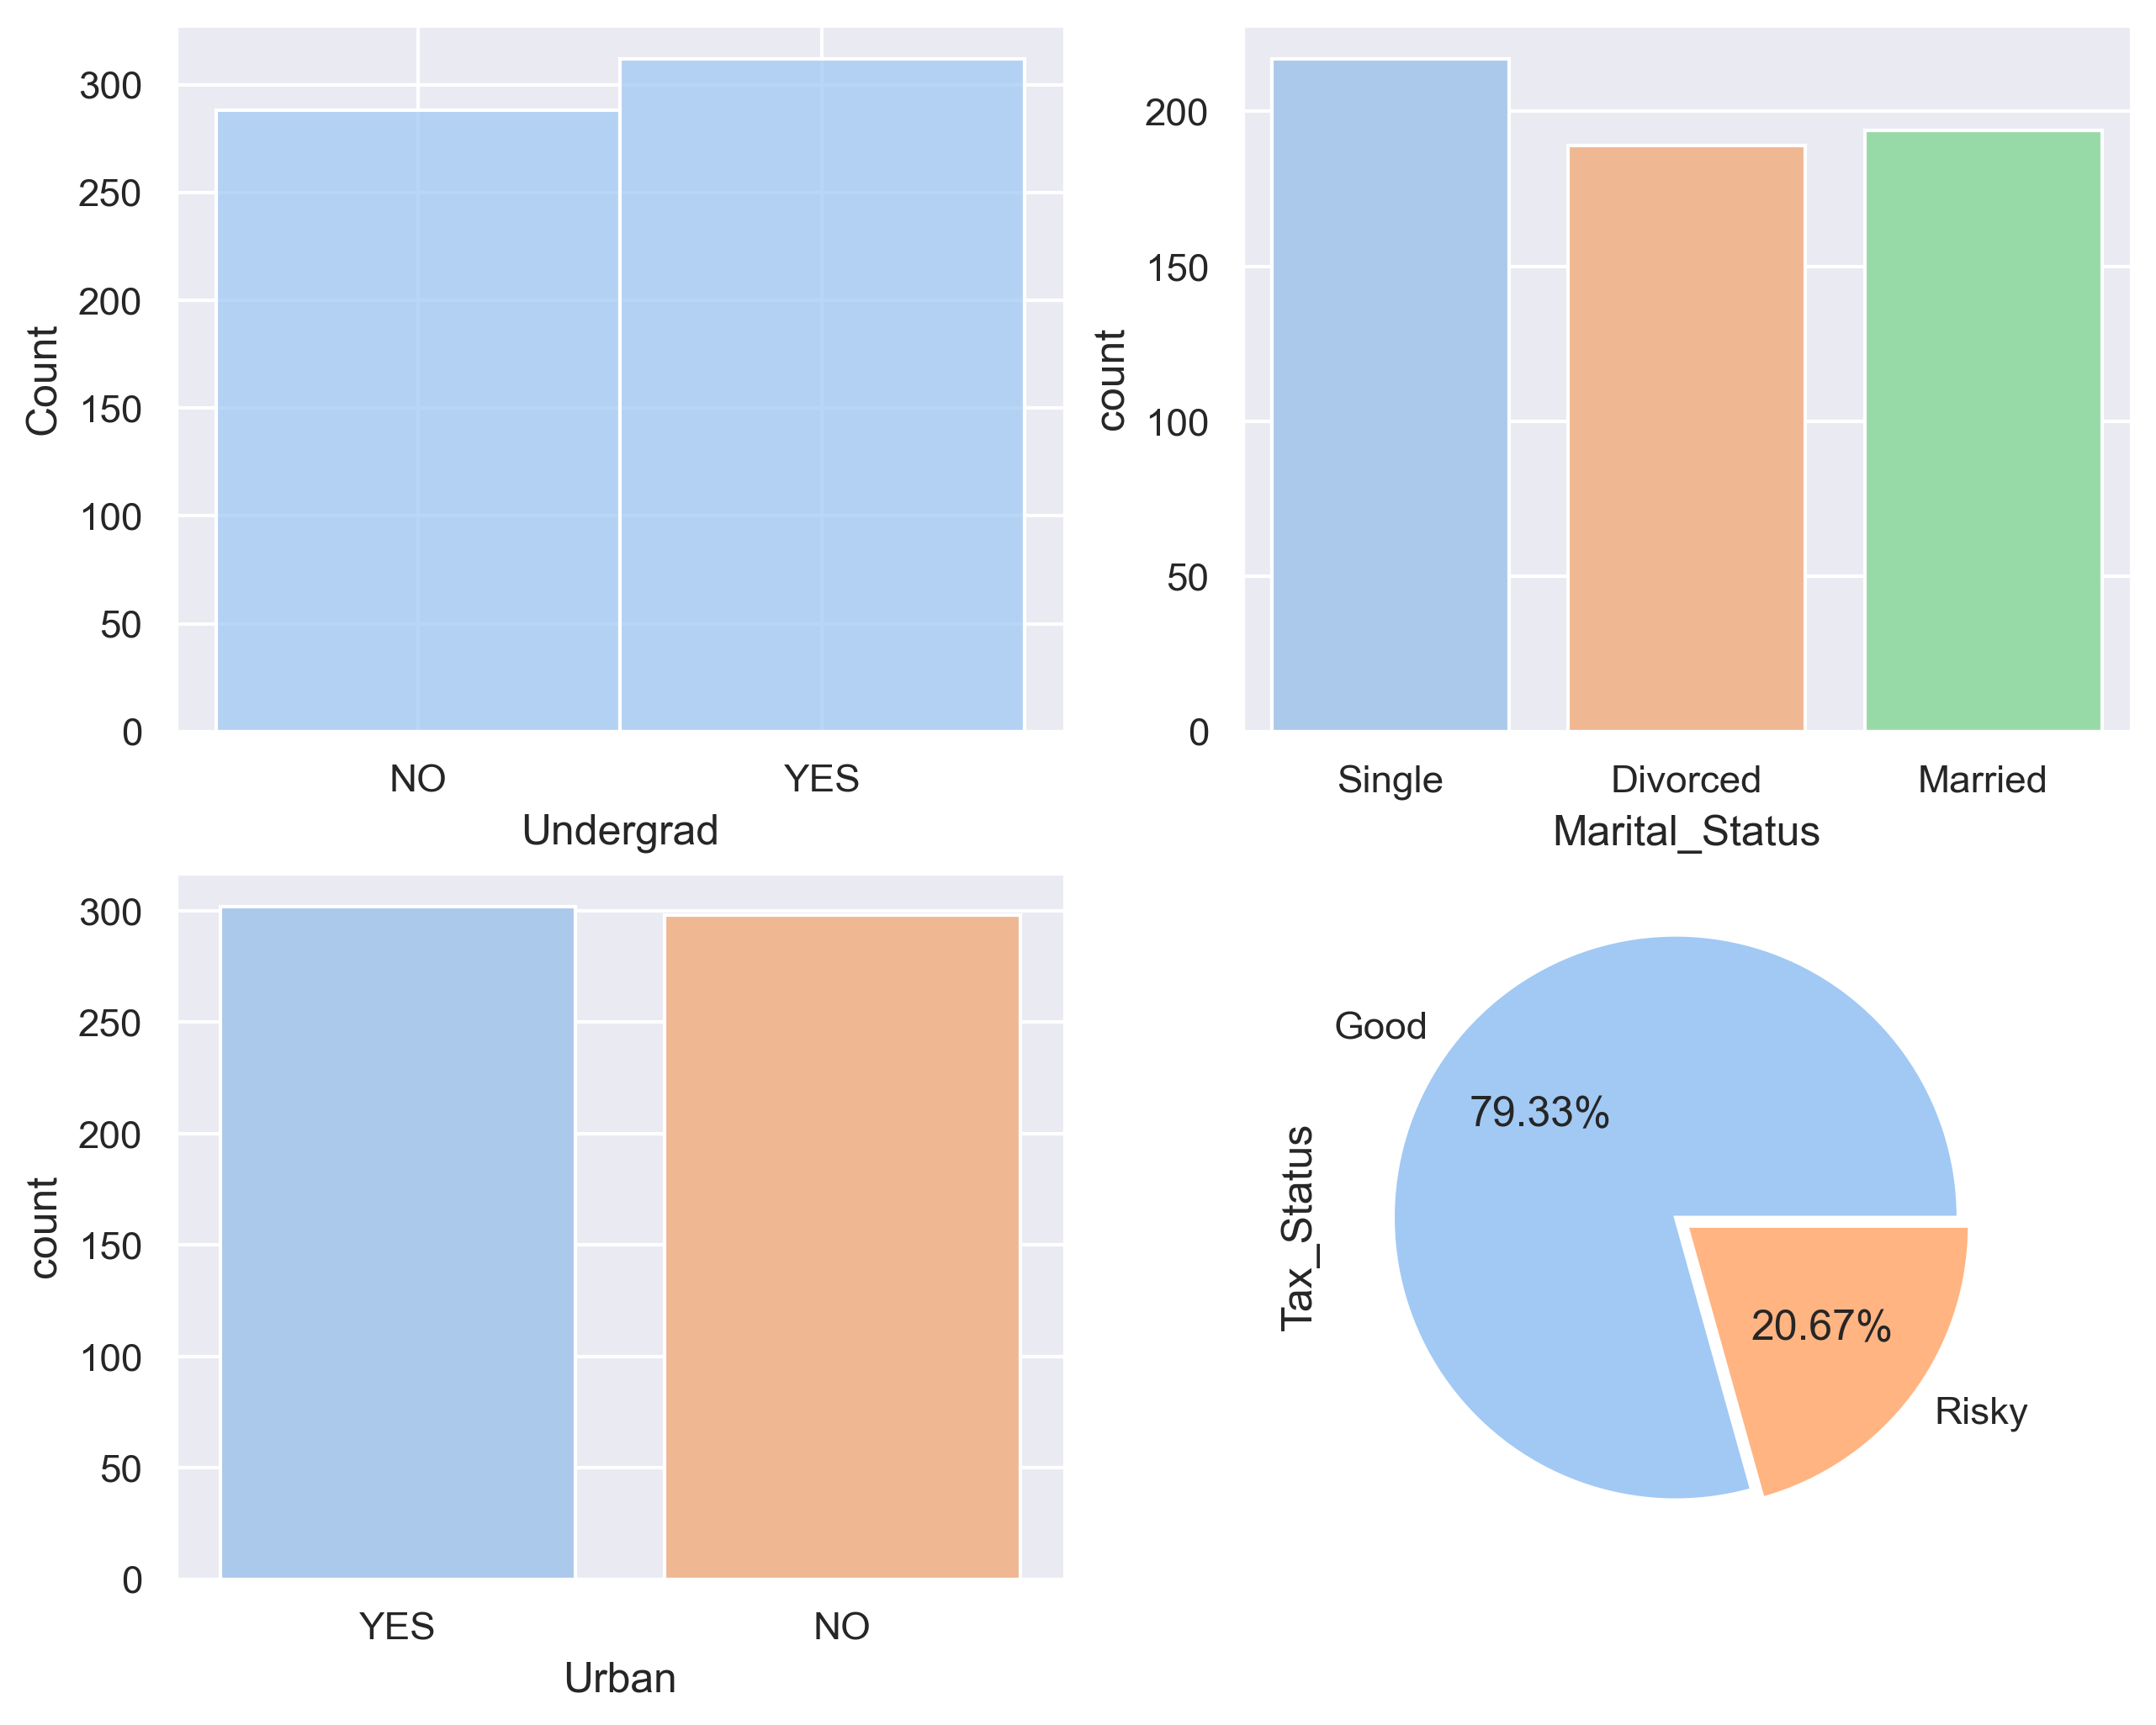

In [10]:
# Plottig Categorical Variables:
fig,index = plt.subplots(2,2)

sns.histplot(df['Undergrad'],ax = index[0,0])
sns.countplot(x = df['Marital_Status'], ax = index[0,1])
sns.countplot(x = df['Urban'], ax = index[1,0])
df['Tax_Status'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', ax = index[1,1], explode= [0.05,0.0])
plt.tight_layout

Taxable_Income        Axes(0.125,0.11;0.227941x0.77)
City_Population    Axes(0.398529,0.11;0.227941x0.77)
Work_Experience    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

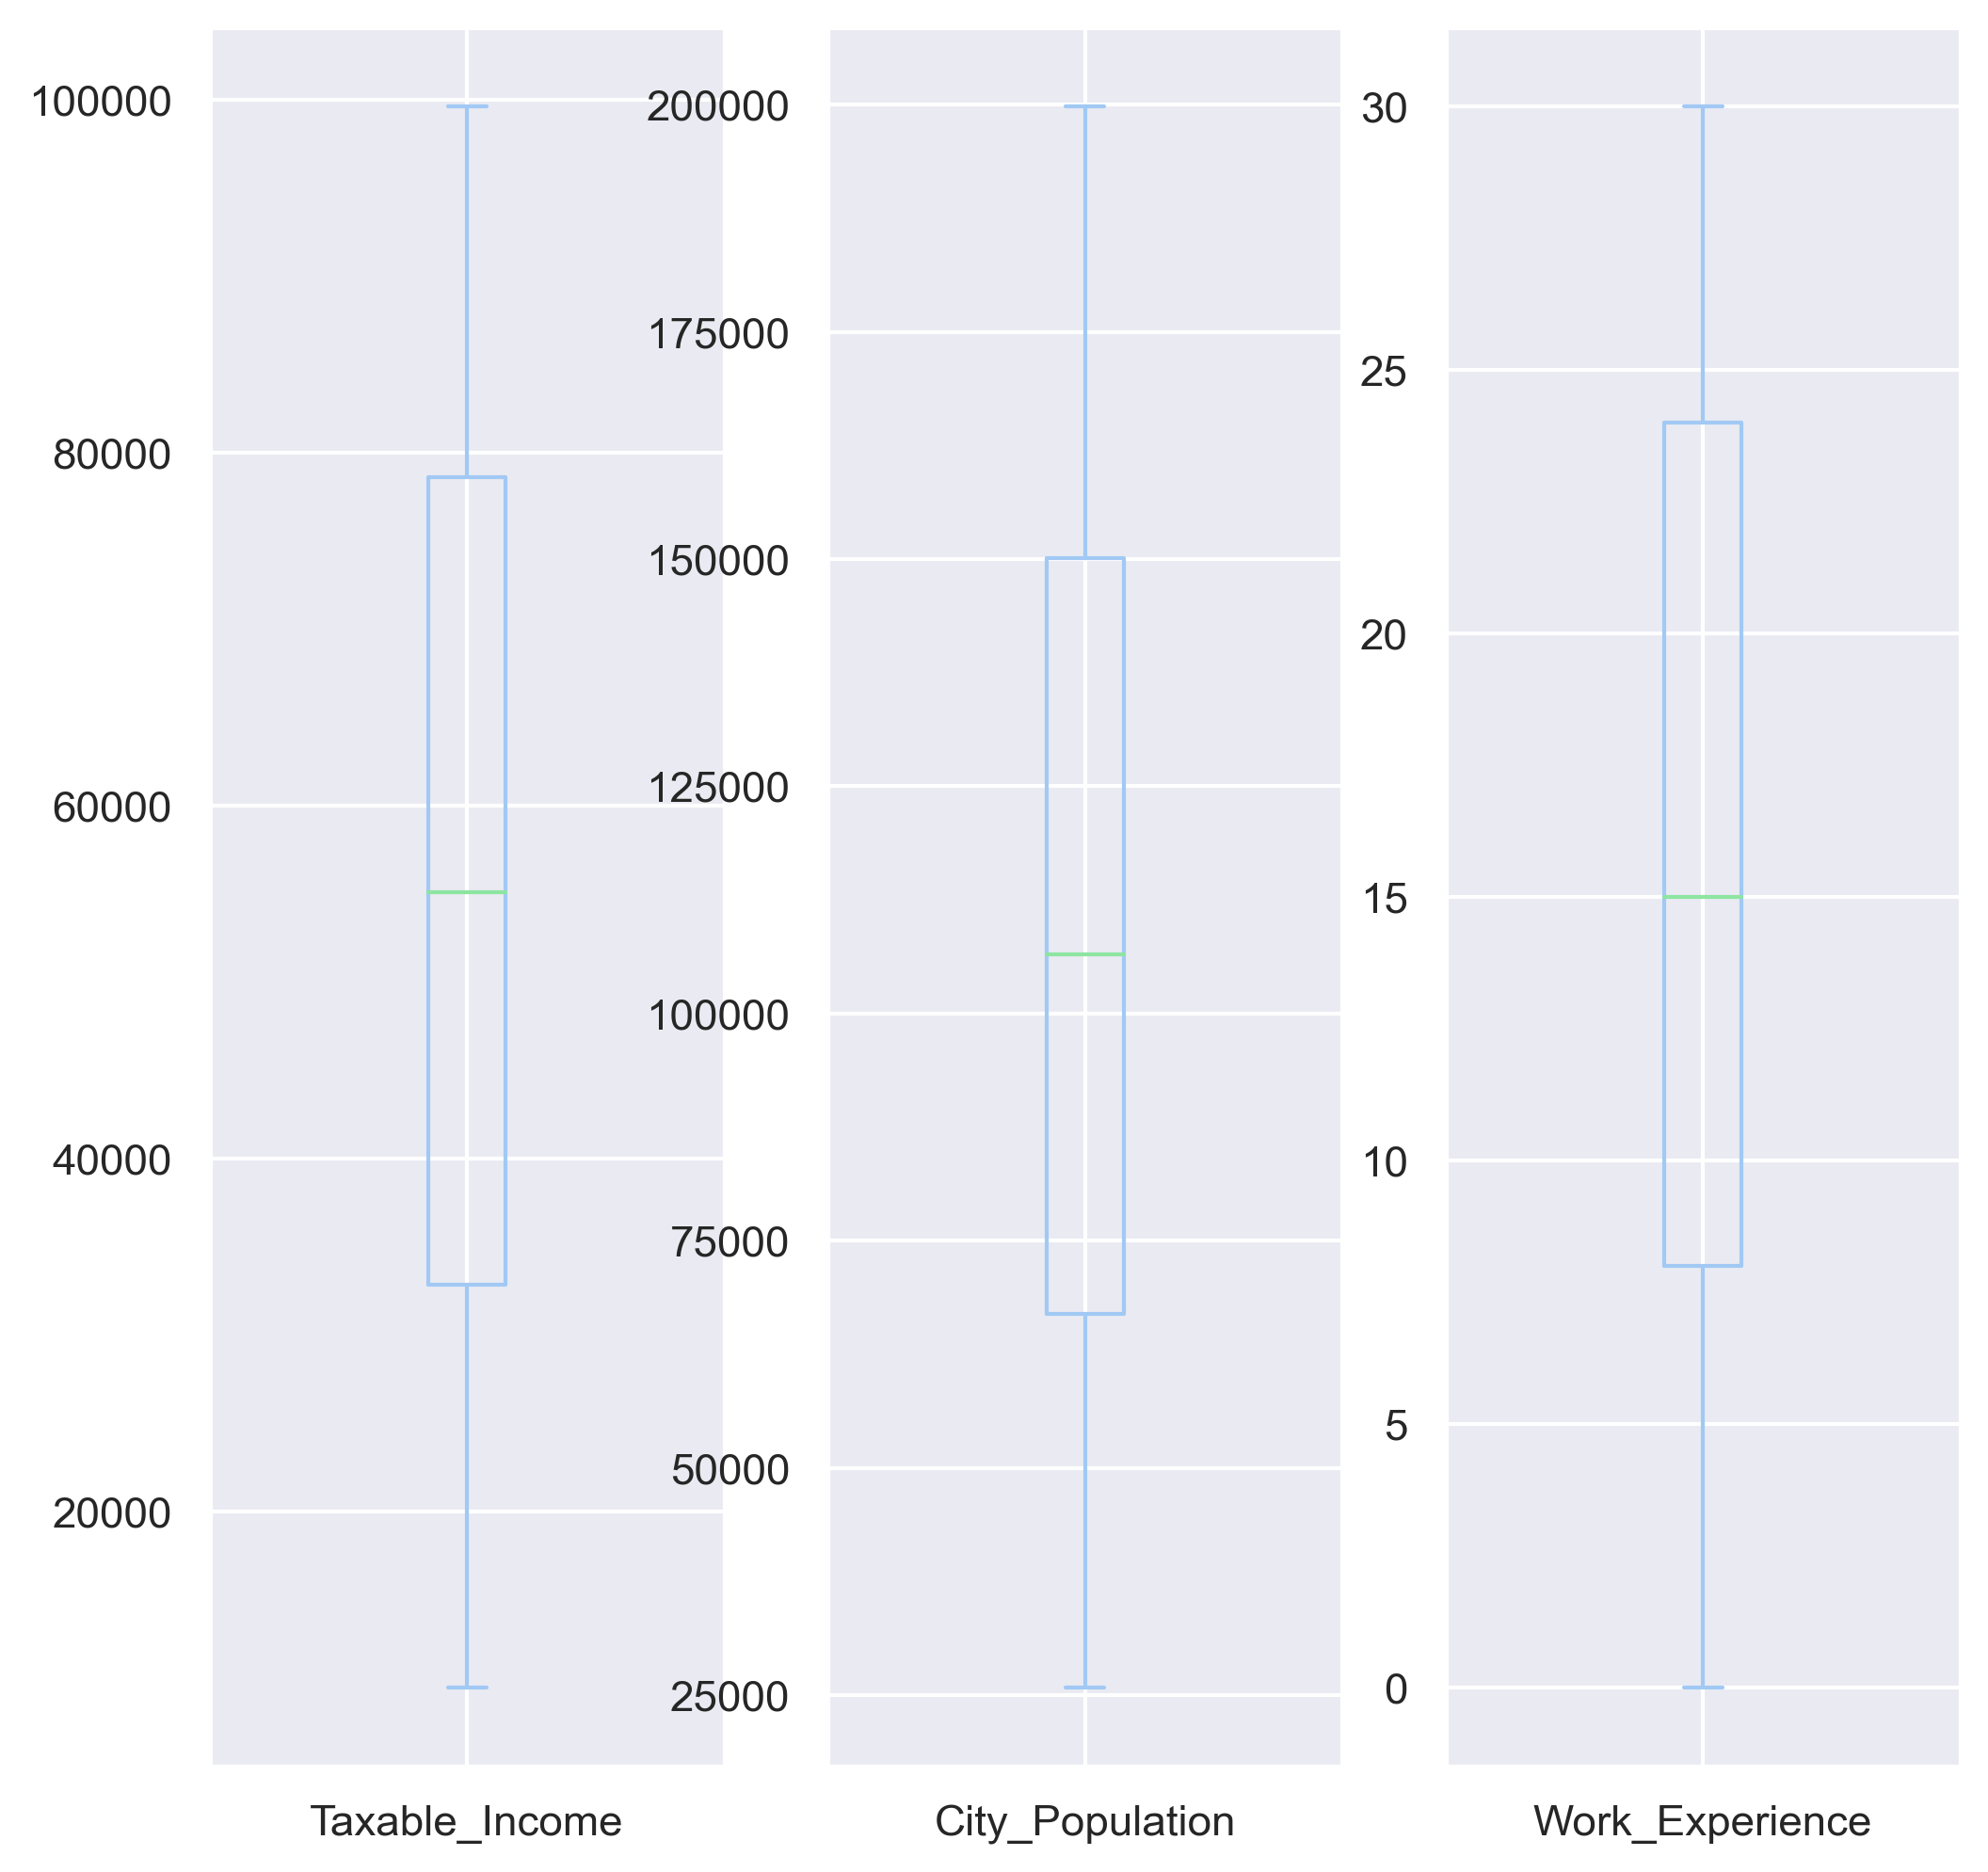

In [11]:
# Boxplot for Numerical Variable:
df[['Taxable_Income', 'City_Population', 'Work_Experience']].plot(kind = 'box', figsize = (8,8), subplots = True)

> * #### We can't see any strong correlation within the numerical variables and no outliers observed in boxplot.
> * #### Percentage of Under-graduated and graduated are almost equal. Same as with Urban population.
> * #### For 'Marital_Status', majority are belongs to Single category followed by Married then Divorced.
> * #### For target variable, 'Tax_Status', 79.33% belong to "Good" category i.e. 'Taxable_Income' greater than 30000, which indicates biased data.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Ordinal Encoding 
* Majority of variables are of object data type so we encode them into numerical data type using Ordinal Encoding.

In [12]:
# Dropping the column Taxable_Income from which we created Target column:
df.drop('Taxable_Income', axis= 1, inplace= True)

In [13]:
# Getting Independent Categorical Variables:
cat_cols = df[['Undergrad', 'Marital_Status', 'Urban']].columns
cat_cols

Index(['Undergrad', 'Marital_Status', 'Urban'], dtype='object')

In [14]:
oe = OrdinalEncoder()
df[cat_cols] = oe.fit_transform(df[cat_cols])
df.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Tax_Status
0,0.0,2.0,50047,10,1.0,Good
1,1.0,0.0,134075,18,1.0,Good
2,0.0,1.0,160205,30,1.0,Good
3,1.0,2.0,193264,15,1.0,Good
4,0.0,1.0,27533,28,0.0,Good


In [15]:
df['Tax_Status'].value_counts()

Good     476
Risky    124
Name: Tax_Status, dtype: int64

### <font color = "green">➡ Train Test Split 

In [16]:
x = df.iloc[:,:5]
y = df['Tax_Status']

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [18]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (420, 5)
Shape of x_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test (180,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [19]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

In [20]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.80      0.74      0.77       143
       Risky       0.21      0.27      0.24        37

    accuracy                           0.64       180
   macro avg       0.50      0.51      0.50       180
weighted avg       0.68      0.64      0.66       180



In [21]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 64.44%


In [22]:
print(f'Tranning Score: {dt.score(xtrain,ytrain)}')
print(f'Testing Score:{dt.score(xtest,ytest)}')

Tranning Score: 1.0
Testing Score:0.6444444444444445


In [23]:
print(f'Confusion Matrix: \n {confusion_matrix(ytest,ypred)}')

Confusion Matrix: 
 [[106  37]
 [ 27  10]]


> * #### There is hugh difference in Training And Testing Accuracy with n_estimators = 100. Also the training accuracy is 100% means there is problem of overfitting. So, we perform Hyperparameter Tunning.

___

* ### <font color = 'blue'> <u> HYPERPARAMETER TUNNING</u>

In [24]:
# Defining Dictionary of Parameters:
params = {'criterion' : ["gini", "entropy", "log_loss"], 
          'splitter' : ["best", "random"], 
          'max_depth' : [2,4,6,7,9,12,14],
          'min_samples_split' : [4,6,8,10,12],
          'max_leaf_nodes' : [2,4,6],
          'min_samples_leaf' : [1,2,3,4,5]
         }

In [25]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, verbose= -1,cv= 5)

In [26]:
# Getting Best Parameters:
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 7, 9, 12, 14],
                         'max_leaf_nodes': [2, 4, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10, 12],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [27]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 9,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'splitter': 'random'}

In [28]:
# New Model with parameters we achieved:
dt = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_depth = 6, 
                            max_leaf_nodes = 6, min_samples_leaf = 1, min_samples_split = 12)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.79      1.00      0.89       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [29]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 79.44%


In [30]:
print(f'Tranning Score: {dt.score(xtrain,ytrain)}')
print(f'Testing Score:{dt.score(xtest,ytest)}')

Tranning Score: 0.7928571428571428
Testing Score:0.7944444444444444


In [31]:
print(f'Confusion Matrix: \n {confusion_matrix(ytest,ypred)}')

Confusion Matrix: 
 [[143   0]
 [ 37   0]]


Text(277.75, 0.5, 'Actual Values')

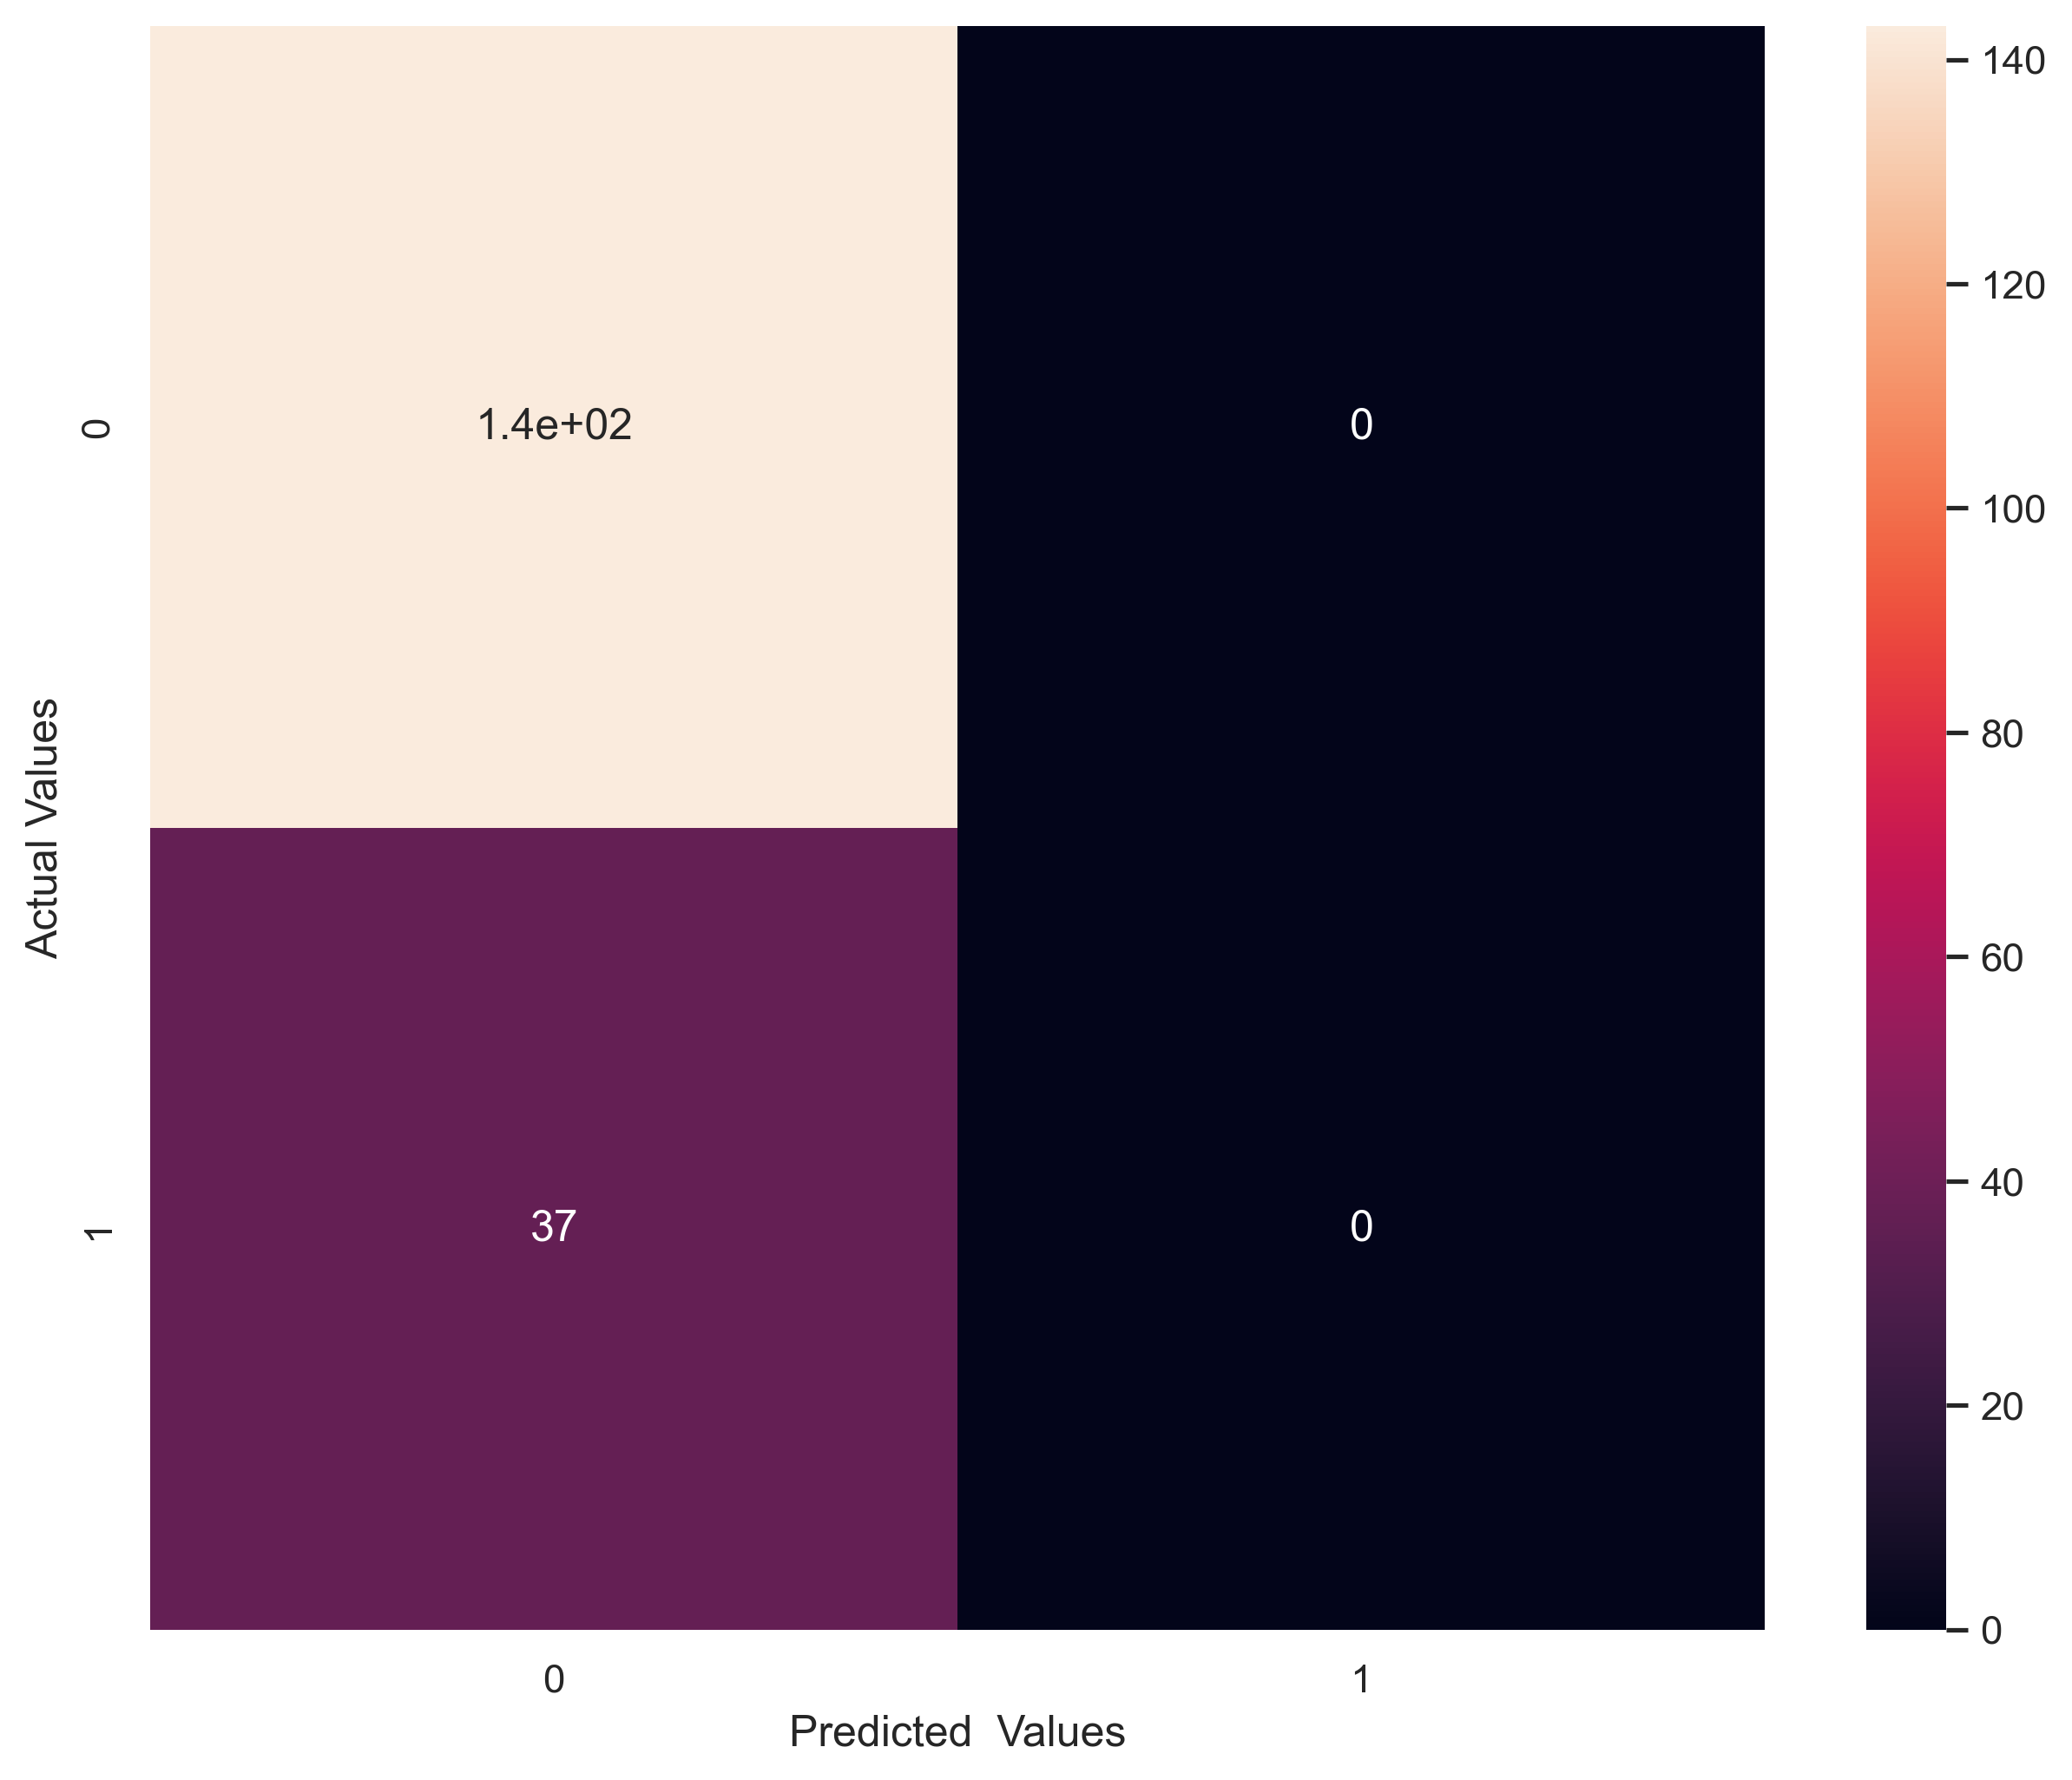

In [32]:
# Visualise the confusion matrix:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Predicted  Values')
plt.ylabel('Actual Values')

### <font color = "green">➡ Information Gain 

In [37]:
# Important Variables:
dt.feature_importances_

array([0.19352895, 0.34158217, 0.29090146, 0.        , 0.17398742])

In [38]:
pd.DataFrame({
    'feature':x.columns,
    'IG':dt.feature_importances_
}).sort_values('IG',ascending=False)

,feature,IG
1,Marital_Status,0.341582
2,City_Population,0.290901
0,Undergrad,0.193529
4,Urban,0.173987
3,Work_Experience,0.000000


### <font color = "green">➡ Visualising Tree:

[Text(0.4444444444444444, 0.9, 'Marital_Status <= 0.577\ngini = 0.328\nsamples = 420\nvalue = [333, 87]\nclass = Good'),
 Text(0.2222222222222222, 0.7, 'Undergrad <= 0.335\ngini = 0.278\nsamples = 126\nvalue = [105, 21]\nclass = Good'),
 Text(0.1111111111111111, 0.5, 'gini = 0.213\nsamples = 66\nvalue = [58, 8]\nclass = Good'),
 Text(0.3333333333333333, 0.5, 'gini = 0.339\nsamples = 60\nvalue = [47, 13]\nclass = Good'),
 Text(0.6666666666666666, 0.7, 'Marital_Status <= 1.239\ngini = 0.348\nsamples = 294\nvalue = [228, 66]\nclass = Good'),
 Text(0.5555555555555556, 0.5, 'gini = 0.379\nsamples = 134\nvalue = [100, 34]\nclass = Good'),
 Text(0.7777777777777778, 0.5, 'Urban <= 0.997\ngini = 0.32\nsamples = 160\nvalue = [128, 32]\nclass = Good'),
 Text(0.6666666666666666, 0.3, 'City_Population <= 188505.052\ngini = 0.368\nsamples = 74\nvalue = [56, 18]\nclass = Good'),
 Text(0.5555555555555556, 0.1, 'gini = 0.344\nsamples = 68\nvalue = [53, 15]\nclass = Good'),
 Text(0.7777777777777778, 0.1

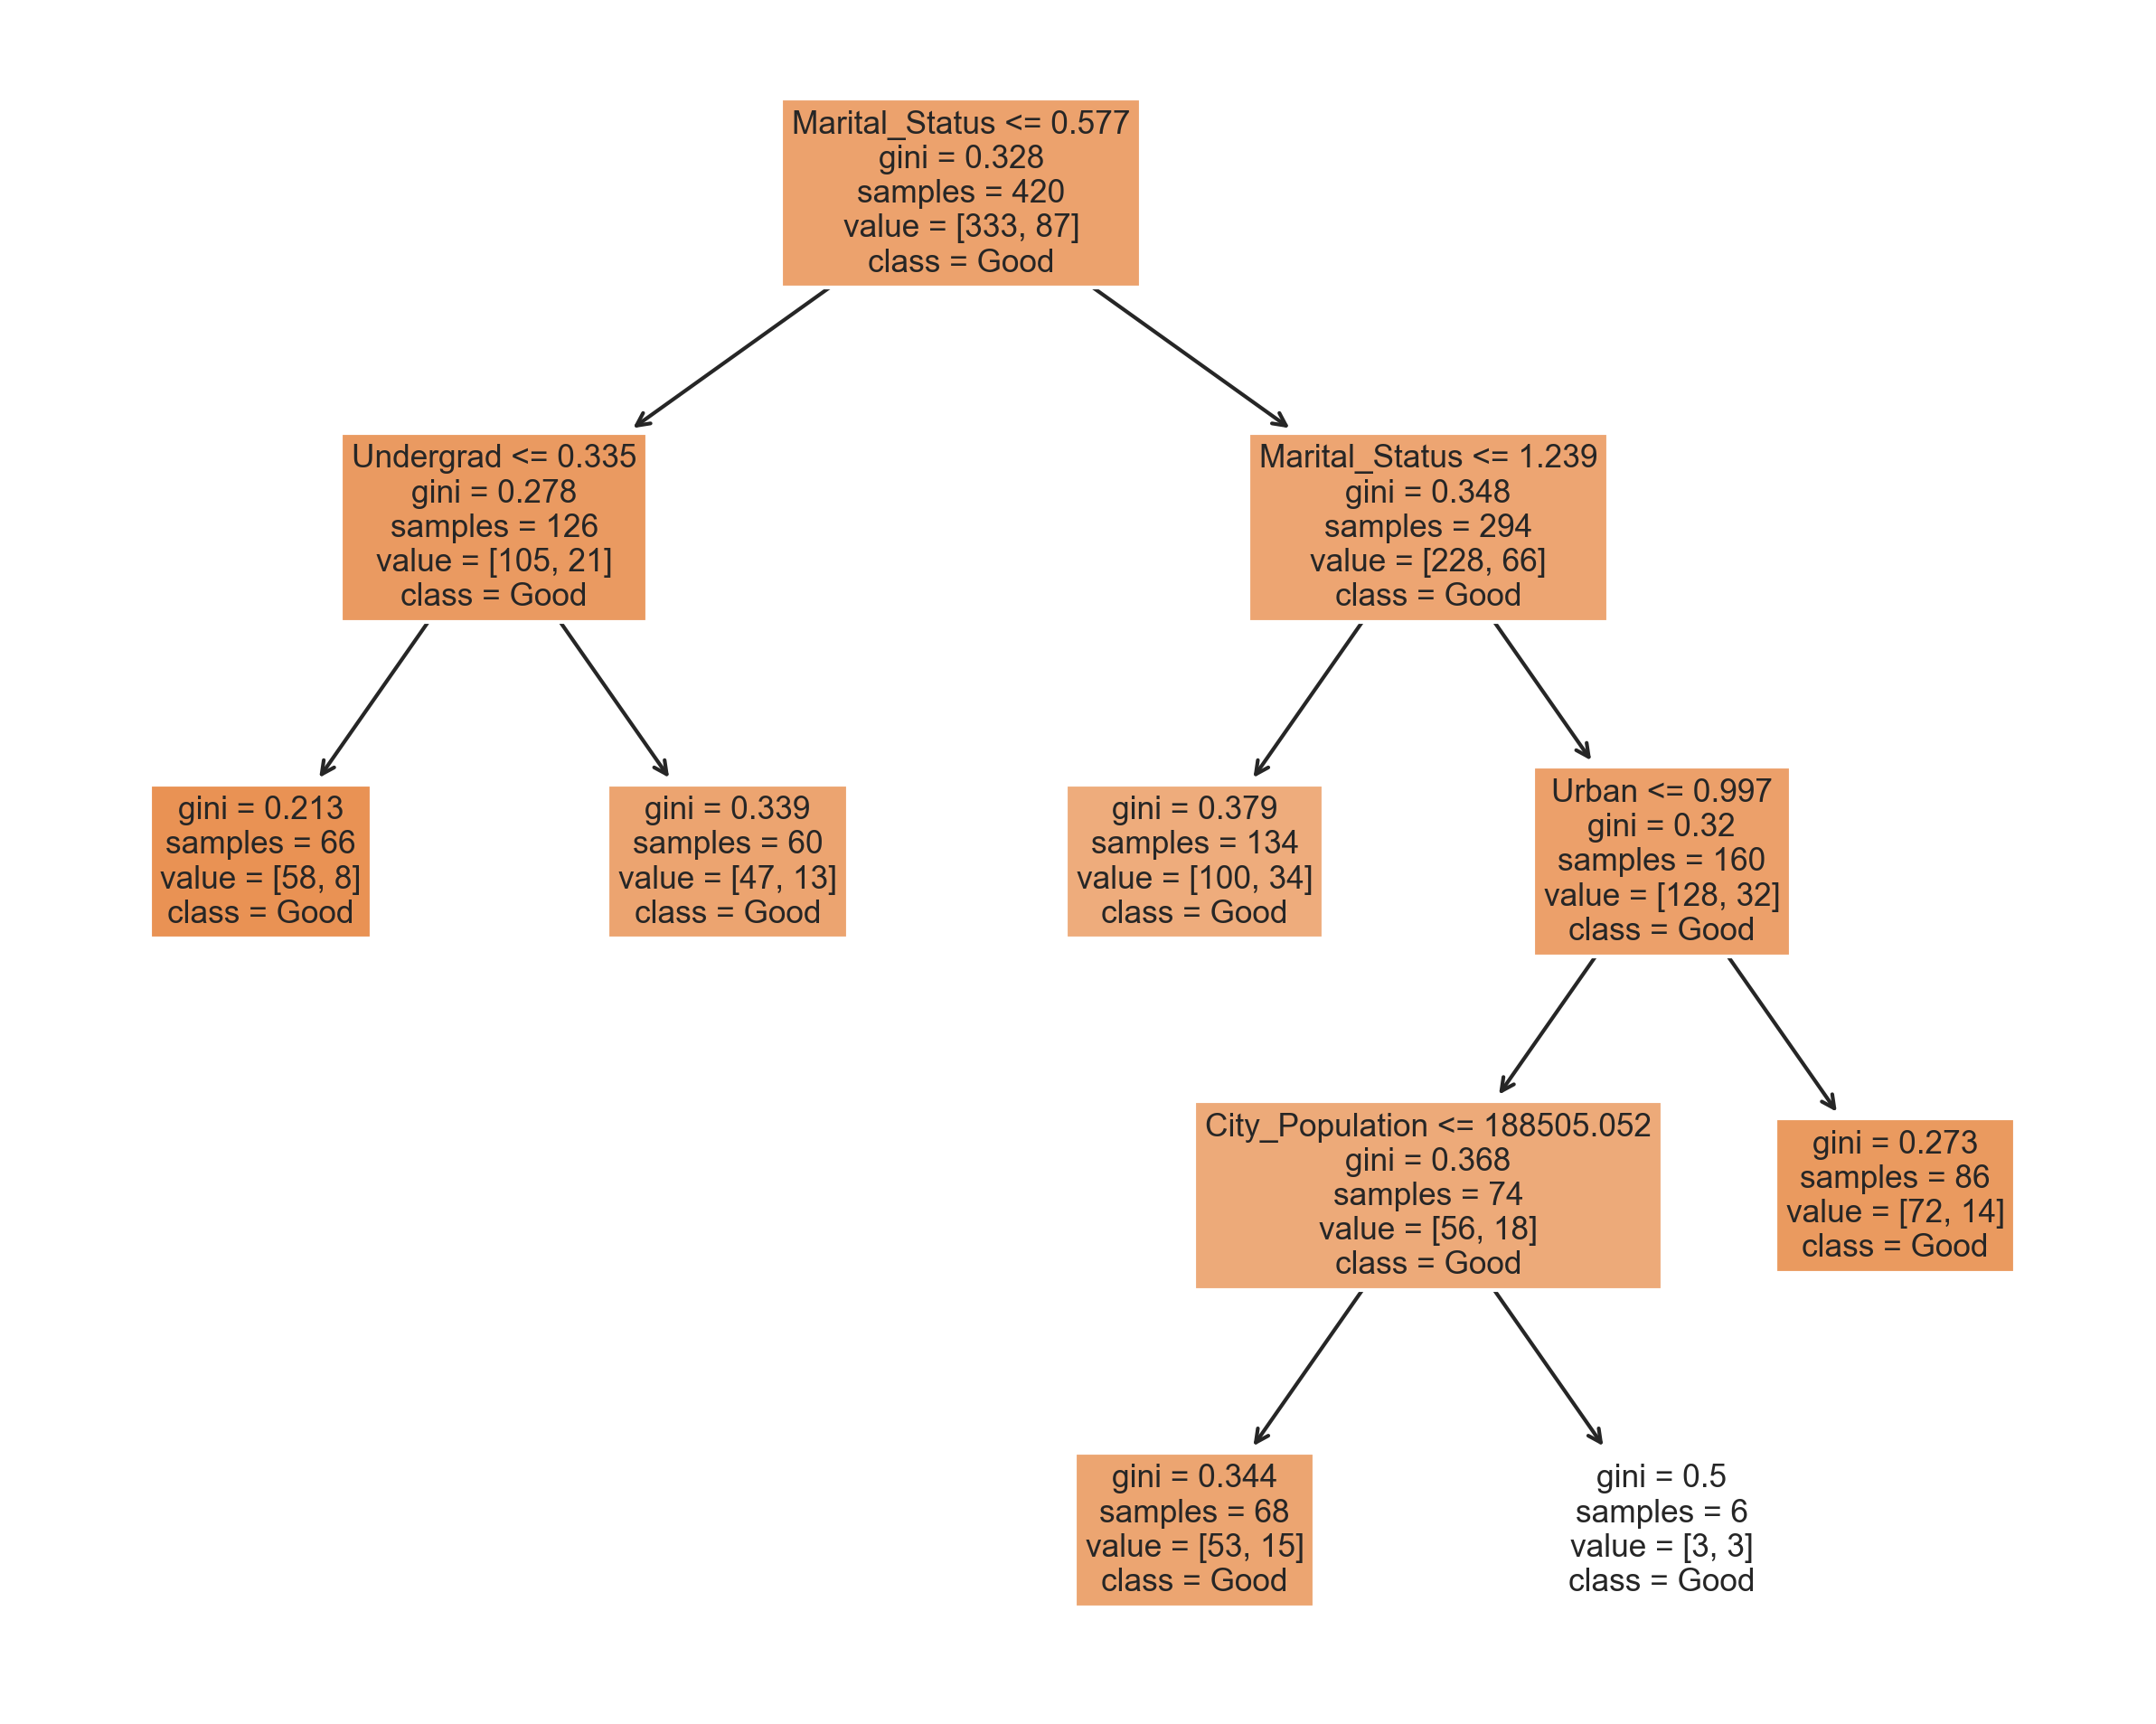

In [36]:
tree.plot_tree(dt, feature_names=x.columns, class_names=df['Tax_Status'].unique(), filled=True)

> * #### Training and Testing Accuracy are almost same i.e. 79%.
> * #### We can say model performing well on Testing data but fails to predict the "Risky" data points, i.e. 1.  This is due to biased dataset.
> * #### "Marital_Status" with high IG is becomes Root node, feature "Work_Experience" has zero IG, So not considered in any decision mode. 

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___